# Simple Neural Network with TensorFlow
One hidden layer with 5 units and dropout

In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Datasets


In [25]:
train = pd.read_csv('11-10_train_dataset_W1.csv')
val = pd.read_csv('11-10_val_dataset_W1.csv')

train.set_index('pid', inplace=True)
val.set_index('pid', inplace=True)

X_train_binary = train.drop(['BDI2', 'dep'], axis=1).values
y_train_binary = train['dep'].values
X_val_binary = val.drop(['BDI2', 'dep'], axis=1).values
y_val_binary = val['dep'].values

#the regression data has NaN values that need to be dropped

train_reg = train.dropna(inplace=False)
val_reg = val.dropna(inplace=False)

X_train_reg = train_reg.drop(['BDI2', 'dep'], axis=1).values
y_train_regression = train_reg['BDI2'].values
X_val_reg = val_reg.drop(['BDI2', 'dep'], axis=1).values
y_val_regression = val_reg['BDI2'].values

input_dim_binary = X_train_binary.shape[1]
input_dim_regression = X_train_reg.shape[1] 

## Define Model Architecture
One hidden layer with 5 units and dropout

In [16]:
# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

In [26]:

input_dim = input_dim_binary  # Replace with your actual number of features

model_binary = keras.Sequential([

    layers.Input(shape=(input_dim,)),
    
    # Hidden layer with 5 units
    layers.Dense(5, activation='relu', name='hidden_layer'),
    
    # Dropout layer
    layers.Dropout(0.5, name='dropout'),
    
    # Output layer
    layers.Dense(1, activation='sigmoid', name='output_layer')  # Adjust as needed
])

# Display model architecture
model_binary.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)            │ (None, 5)              │        25,930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,936 (101.31 KB)

 Trainable params: 25,936 (101.31 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:


input_dim = input_dim_regression  # Replace with your actual number of features

# Create the model
model_BDI = keras.Sequential([
    # Input layer
    layers.Input(shape=(input_dim,)),
    
    # Hidden layer with 5 units
    layers.Dense(5, activation='relu', name='hidden_layer'),
    
    # Dropout layer
    layers.Dropout(0.5, name='dropout'),
    

    # For regression: 1 unit with no activation
    layers.Dense(1, activation=None, name='output_layer')  # Adjust as needed
])

# Display model architecture
model_BDI.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)            │ (None, 5)              │        25,930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,936 (101.31 KB)

 Trainable params: 25,936 (101.31 KB)

 Non-trainable params: 0 (0.00 B)

## Compile Model

In [29]:
# Compile the model
# Adjust loss and metrics based on your task:
# - Binary classification: 'binary_crossentropy'
# - Multi-class: 'categorical_crossentropy' or 'sparse_categorical_crossentropy'
# - Regression: 'mse' or 'mae'
model_binary.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Adjust based on your task
    metrics=['accuracy']  # Adjust based on your task
)

model_BDI.compile(
    optimizer='adam',
    loss='mse',  # Adjust based on your task
    metrics=['mse']  # Adjust based on your task
)

## Train Model

In [44]:
# Train the model
history_binary = model_binary.fit(
    X_train_binary,
    y_train_binary,
    epochs=50,  # Adjust as needed
    batch_size=32,  # Adjust as needed
    validation_data=(X_val_binary, y_val_binary),
    verbose=1
)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6263 - loss: 0.6685 - val_accuracy: 0.6744 - val_loss: 5971487.0000
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6263 - loss: 0.6684 - val_accuracy: 0.6744 - val_loss: 5971487.0000
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6263 - loss: 0.6684 - val_accuracy: 0.6744 - val_loss: 5971487.0000
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6263 - loss: 0.6683 - val_accuracy: 0.6744 - val_loss: 5971487.0000
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6263 - loss: 0.6682 - val_accuracy: 0.6744 - val_loss: 5971487.0000
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6263 - loss: 0.6811 - val_accuracy: 0.6744 - val_loss: 5971487.0000
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6263 - loss: 0.6681 - val_accuracy: 0.6744 - val_loss: 5971487.0000
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6263 - loss: 0.6745 

In [31]:
history_bdi = model_BDI.fit(
    X_train_reg,
    y_train_regression,
    epochs=50,  # Adjust as needed
    batch_size=32,  # Adjust as needed
    validation_data=(X_val_reg, y_val_regression),
    verbose=1
)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 2563326676566016.0000 - mse: 2563326676566016.0000 - val_loss: 121365533294592.0000 - val_mse: 121365533294592.0000
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11556704726548480.0000 - mse: 11556704726548480.0000 - val_loss: 51365237751808.0000 - val_mse: 51365237751808.0000
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 285106975539200.0000 - mse: 285106975539200.0000 - val_loss: 21501268983808.0000 - val_mse: 21501268983808.0000
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 48732586377216.0000 - mse: 48732586377216.0000 - val_loss: 10135039639552.0000 - val_mse: 10135038590976.0000
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 983032920014848.0000 - mse: 983032920014848.0000 - val_loss: 5036527583232.0000 - val_mse: 5036527583232.0000
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 595137396736.0000 - mse: 595137396736.0000 - val_loss: 2595484336128.0000 - val_mse: 259548433

## Evaluate Model

In [32]:
# Evaluate on validation set
val_loss, val_accuracy = model_BDI.evaluate(X_val_reg, y_val_regression)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 107388616704.0000 - mse: 107388616704.0000
Validation Loss: 107388616704.0000
Validation Accuracy: 107388616704.0000


In [33]:
# Evaluate on validation set
val_loss, val_accuracy = model_binary.evaluate(X_val_binary, y_val_binary)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6744 - loss: 5971487.0000
Validation Loss: 5971487.0000
Validation Accuracy: 0.6744


## Plot Training History

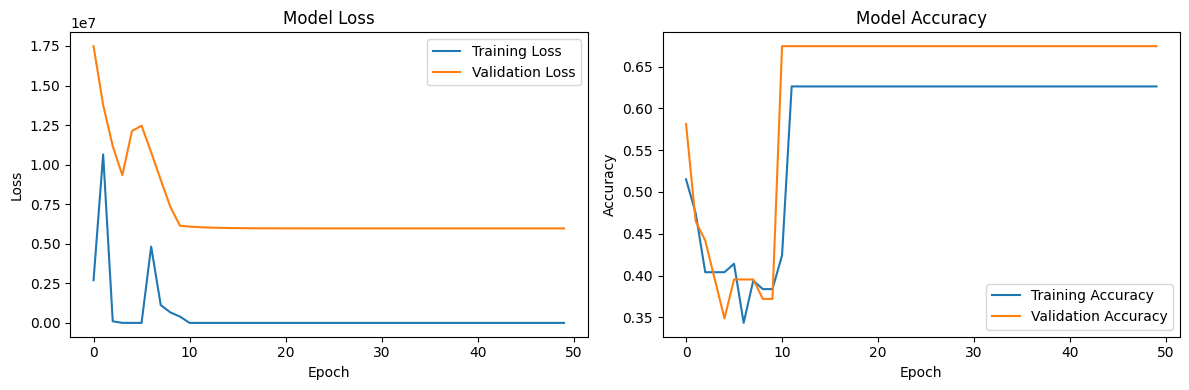

In [36]:

# Plot training history
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history_binary.history['loss'], label='Training Loss')
plt.plot(history_binary.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history_binary.history['accuracy'], label='Training Accuracy')
plt.plot(history_binary.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

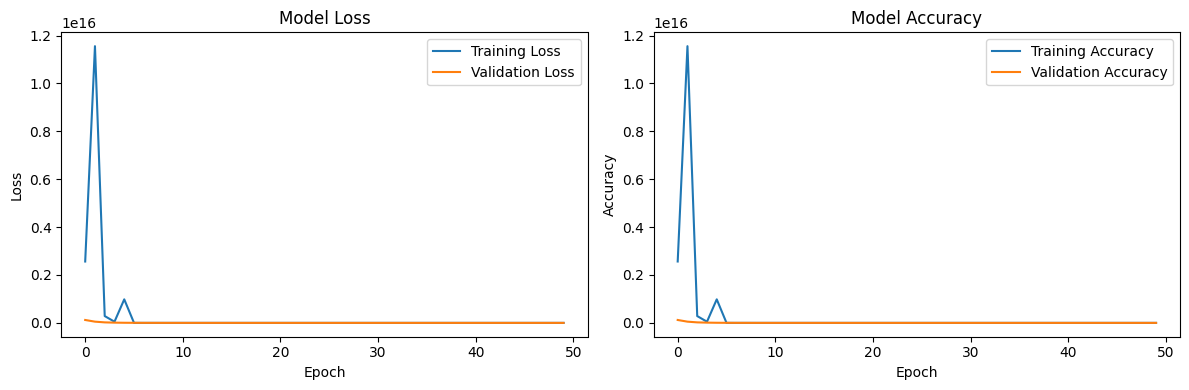

In [42]:

# Plot training history
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history_bdi.history['loss'], label='Training Loss')
plt.plot(history_bdi.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history_bdi.history['mse'], label='Training Accuracy')
plt.plot(history_bdi.history['val_mse'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Make Predictions

In [46]:
# Make predictions on validation set
predictions = model_BDI.predict(X_val_reg)
print(f"Predictions shape: {predictions.shape}")
print(f"First 5 predictions: {predictions[:5].flatten()}")

predictions_binary = model_binary.predict(X_val_binary)
print(f"Predictions shape: {predictions_binary.shape}")
print(f"First 5 predictions: {predictions_binary[:5].flatten()}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predictions shape: (42, 1)
First 5 predictions: [0.00844326 0.00844326 0.00844326 0.00844326 0.00844326]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predictions shape: (43, 1)
First 5 predictions: [0.46552923 0.46552923 0.46552923 0.46552923 0.46552923]


In [47]:
#dataframe with the predictions and true values for BDI regression
bdi_results = pd.DataFrame({
    'True_BDI': y_val_regression,
    'Predicted_BDI': predictions.flatten()
})

#display the results
bdi_results

,True_BDI,Predicted_BDI
0,2.0,8.443261e-03
1,5.0,8.443261e-03
2,34.0,8.443261e-03
3,12.0,8.443261e-03
4,9.0,8.443261e-03
5,1.0,8.443261e-03
6,8.0,8.443261e-03
7,19.0,8.443261e-03
8,4.0,8.443261e-03
9,34.0,8.443261e-03


In [48]:
#binary results dataframe
binary_results = pd.DataFrame({
    'True_Depression': y_val_binary,
    'Predicted_Probability': predictions_binary.flatten()
})
binary_results

,True_Depression,Predicted_Probability
0,False,0.465529
1,False,0.465529
2,True,0.465529
3,False,0.465529
4,False,0.465529
5,False,0.465529
6,False,0.465529
7,True,1.000000
8,False,0.465529
9,True,0.465529


In [49]:
#total predicted as true
total_predicted_true = (predictions_binary.flatten() >= 0.5).sum()
print(f"Total predicted as true: {total_predicted_true}")

Total predicted as true: 2
